In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path = '/content/drive/MyDrive/Sem-7 Books/EE4708/Exam/'


In [3]:
hcl = pd.read_csv("/content/drive/MyDrive/Sem-7 Books/EE4708/Exam/HCL Technologies share prices 2019_2021.csv")
hdfc = pd.read_csv("/content/drive/MyDrive/Sem-7 Books/EE4708/Exam/HDFC Bank Share Prices 2019_2021.csv")
icici = pd.read_csv("/content/drive/MyDrive/Sem-7 Books/EE4708/Exam/ICICI Bank Share Prices 2019_2021.csv")
infy = pd.read_csv("/content/drive/MyDrive/Sem-7 Books/EE4708/Exam/Infosys Share Prices 2019_2021.csv")
sbi = pd.read_csv("/content/drive/MyDrive/Sem-7 Books/EE4708/Exam/SBI Share Prices 2019_2021.csv")
usd = pd.read_csv("/content/drive/MyDrive/Sem-7 Books/EE4708/Exam/USD-INR Exchange rate 2019_2021.csv")
cog = pd.read_csv("/content/drive/MyDrive/Sem-7 Books/EE4708/Exam/Cognizant share prices 2019_2021.csv")


In [4]:
company_list = [hcl, hdfc, icici, infy, sbi, usd, cog]
tech_list = company_name = ['HCL', "HDFC", "ICICI", "INFOSYS", "SBI", "USD", "COGNIZANT"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    company['Date'] = pd.to_datetime(company['Date'])
    
df = pd.concat(company_list, axis=0)

In [5]:
for i in company_list:
  print(i.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'company_name'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'company_name'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'company_name'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'company_name'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'company_name'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'company_name'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'company_name'], dtype='object')


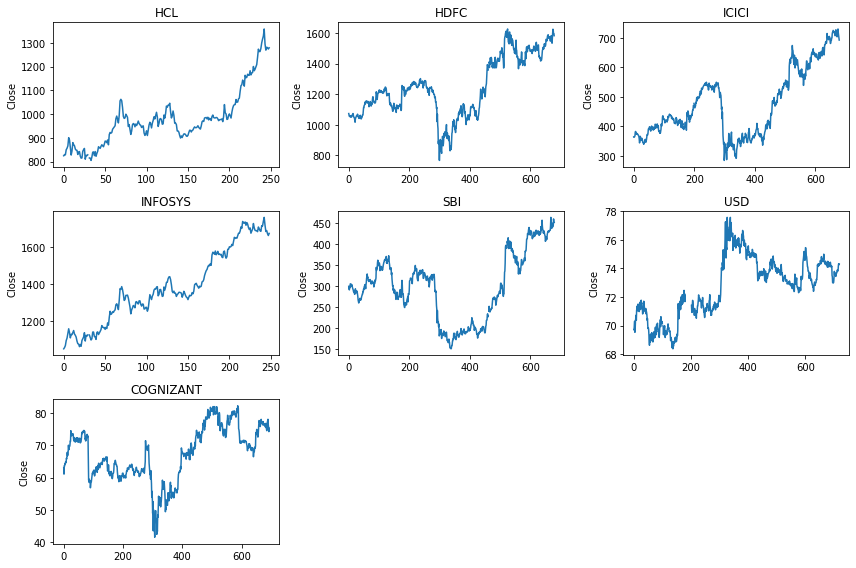

In [37]:
# plt.figure(figsize=(20, 10))
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list):
    plt.subplot(3, 3, i+1)
    plt.plot(company['Close'])
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"{company_name[i]}")
plt.tight_layout()

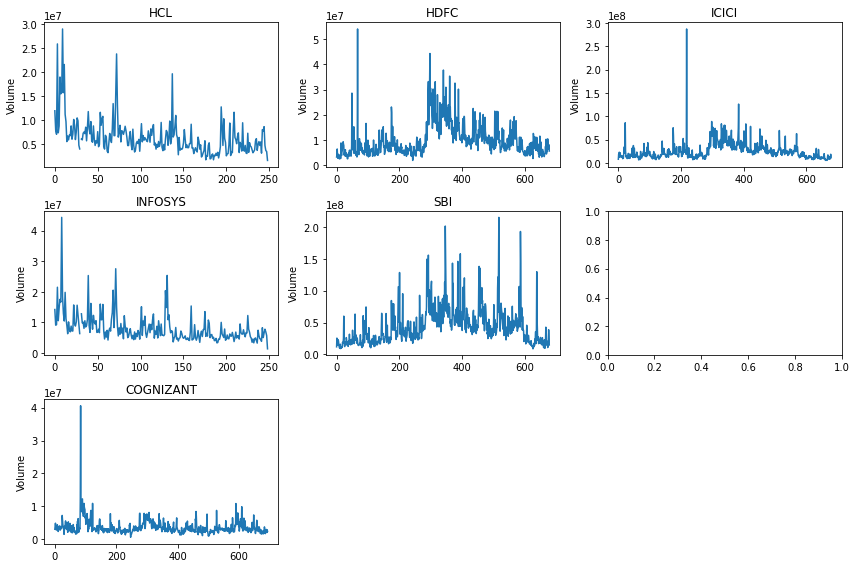

In [7]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    try: 
      plt.subplot(3, 3, i)
      company['Volume'].plot()
      plt.ylabel('Volume')
      plt.xlabel(None)
      plt.title(f"{tech_list[i - 1]}")
    except:
      pass
plt.tight_layout()

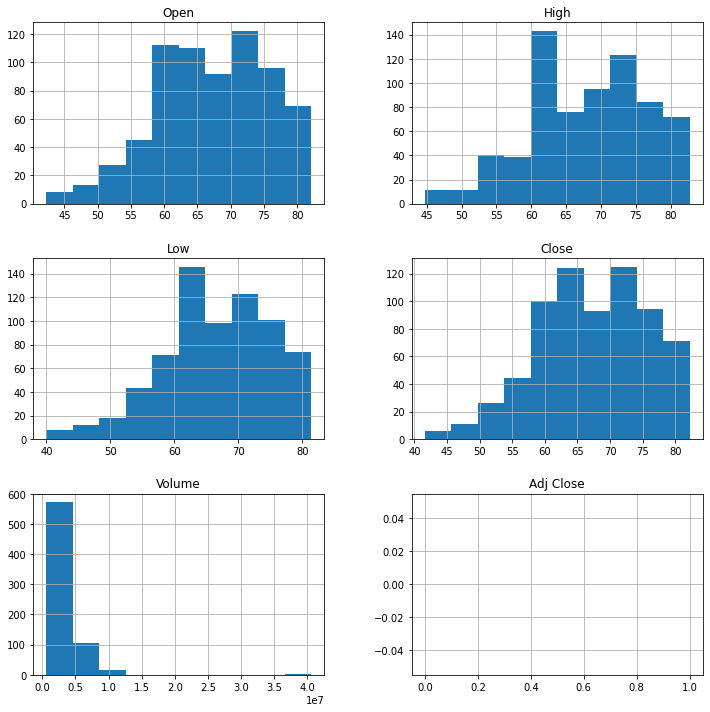

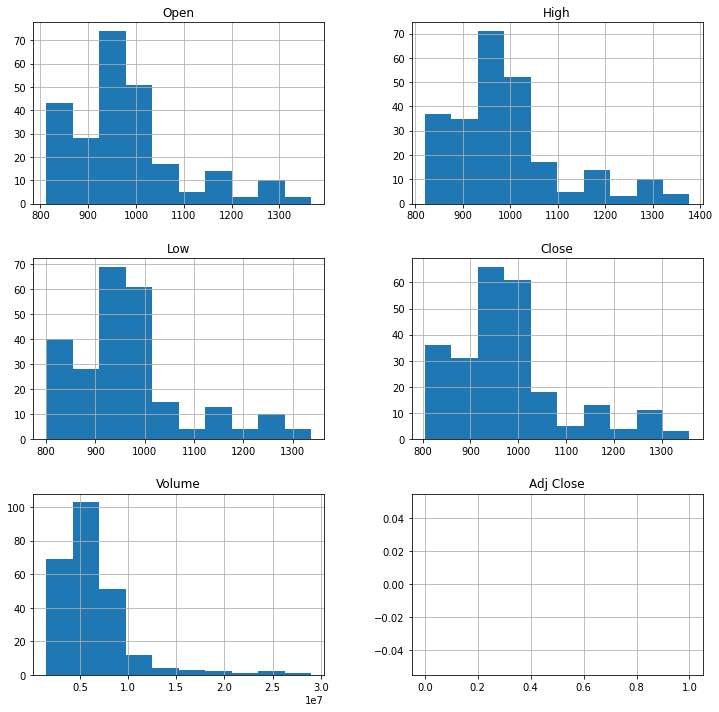

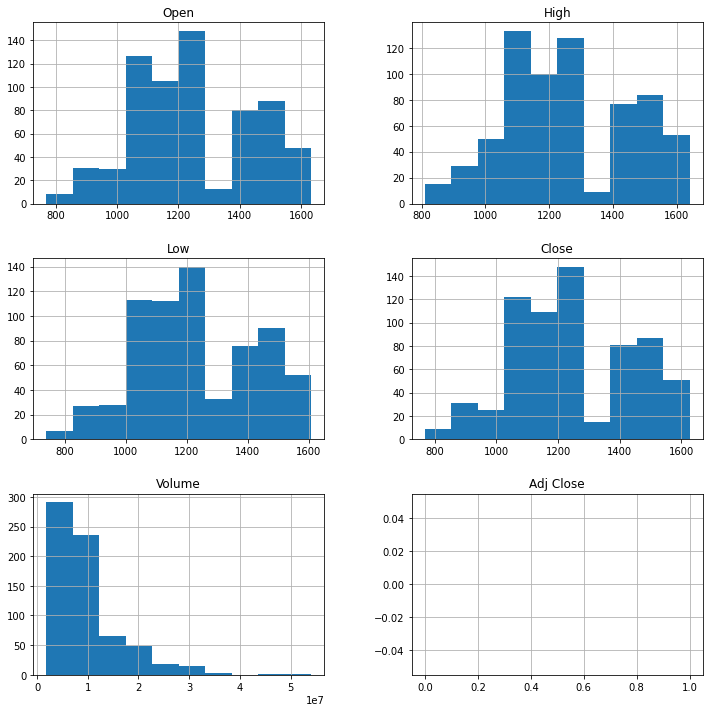

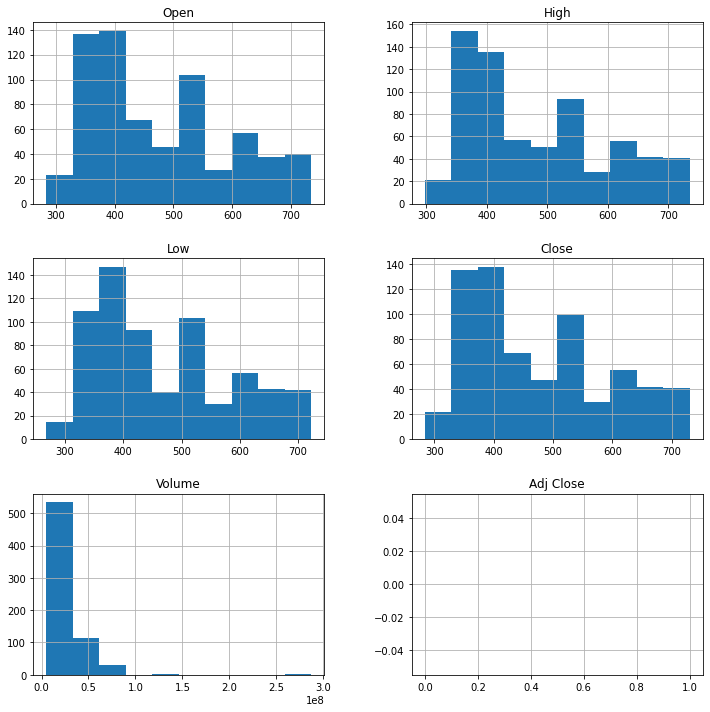

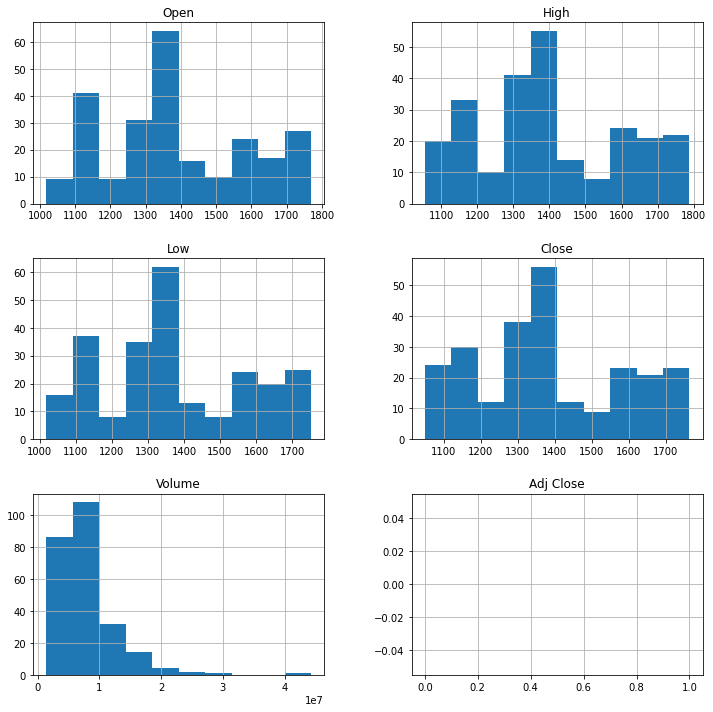

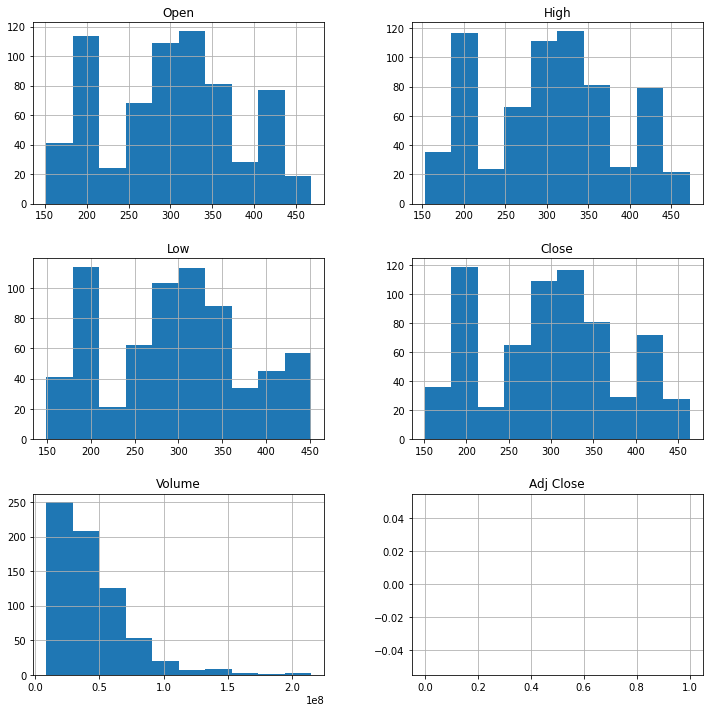

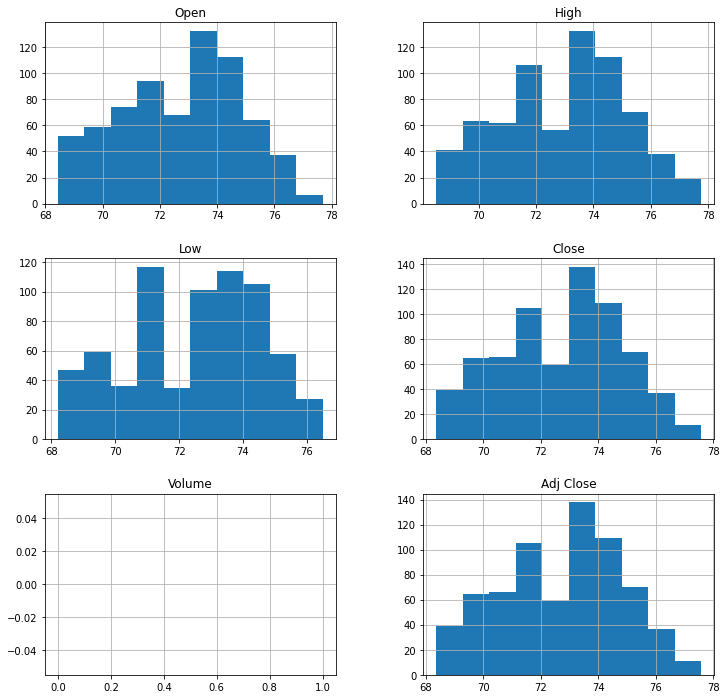

In [8]:
df.groupby("company_name").hist(figsize=(12, 12));

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()

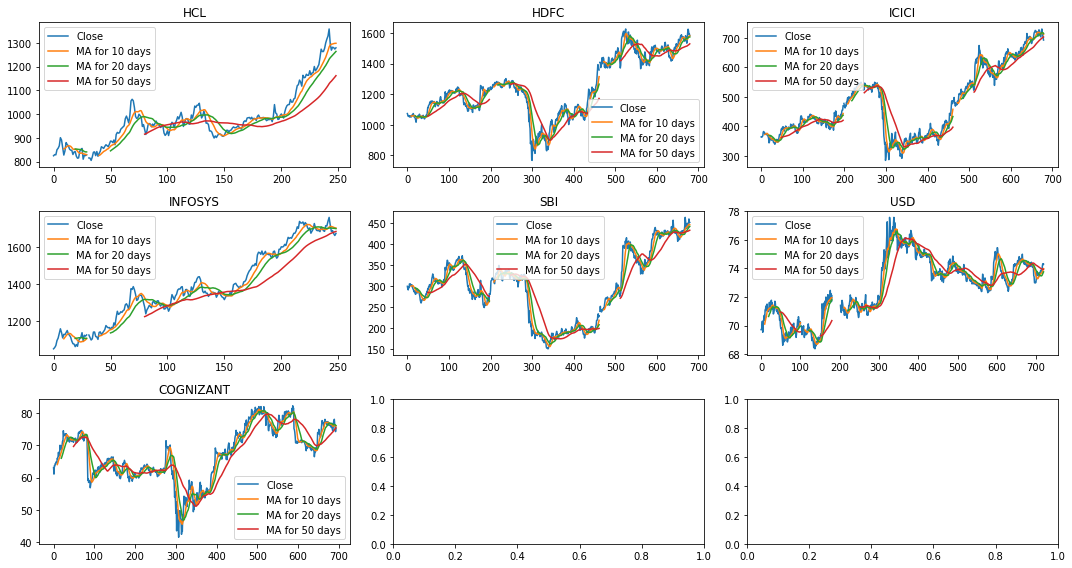

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_figheight(8)
fig.set_figwidth(15)
for i, comp in enumerate(company_list):
  comp[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[int(i/3),i%3])
  axes[int(i/3),i%3].set_title(company_name[i])


fig.tight_layout()

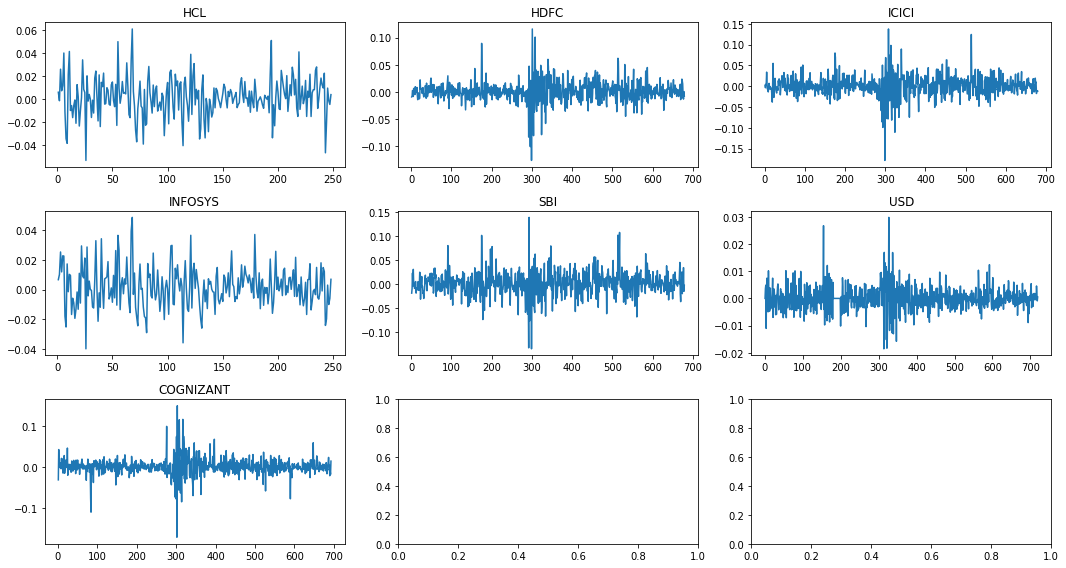

In [11]:
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_figheight(8)
fig.set_figwidth(15)

for i, comp in enumerate(company_list):
  comp['Daily Return'].plot(ax=axes[int(i/3),i%3])
  axes[int(i/3),i%3].set_title(company_name[i])


fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

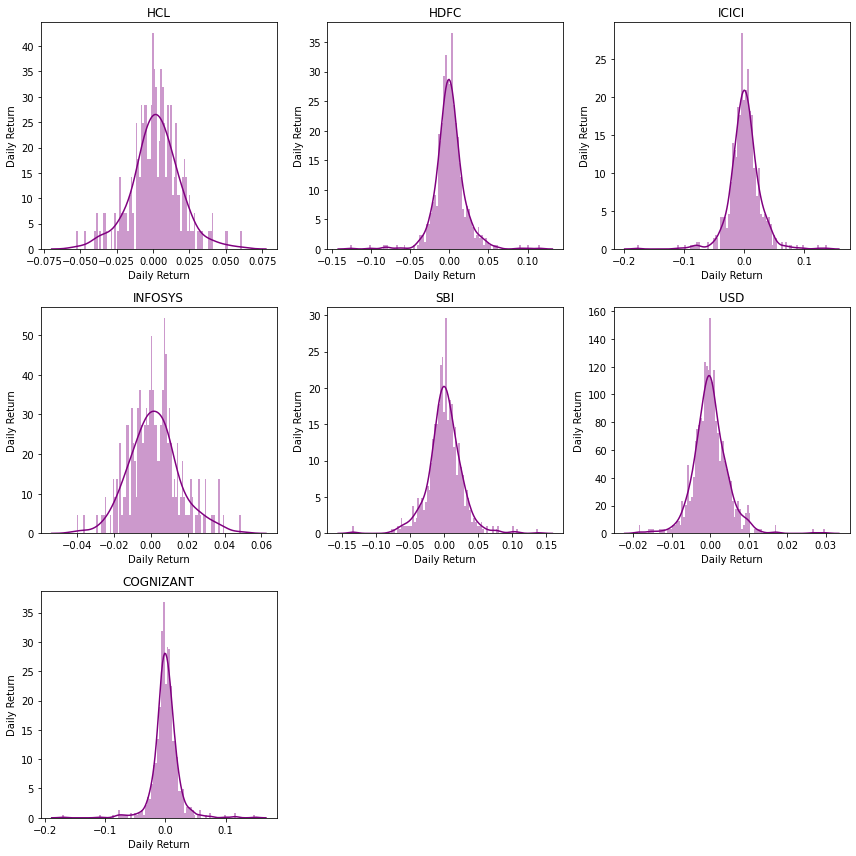

In [12]:
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
plt.tight_layout()
# Could have also done:
#AAPL['Daily Return'].hist()


In [13]:
close_list = []
for i, comp in enumerate(company_list):
   comp = comp.rename(columns={'Close': 'Close_{}'.format(company_name[i])})
   close_list.append(comp[['Date', 'Close_{}'.format(company_name[i])]])
   

In [14]:
from functools import reduce
closing_df = reduce(lambda x,y: pd.merge(x,y, on='Date', how='outer'), close_list).set_index("Date")
closing_df.head() 

,Close_HCL,Close_HDFC,Close_ICICI,Close_INFOSYS,Close_SBI,Close_USD,Close_COGNIZANT
Date,,,,,,,
2020-10-05,824.200012,1114.349976,373.100006,1048.699951,188.750000,73.322403,70.930000
2020-10-06,829.150024,1144.099976,380.600006,1055.750000,191.600006,73.108299,69.830002
2020-10-07,828.049988,1162.250000,382.649994,1066.550049,190.699997,73.815002,72.239998
2020-10-08,849.549988,1191.800049,387.500000,1093.699951,191.500000,73.542503,72.910004
2020-10-09,855.750000,1233.550049,401.500000,1106.800049,198.300003,73.280502,73.080002


In [15]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,Close_HCL,Close_HDFC,Close_ICICI,Close_INFOSYS,Close_SBI,Close_USD,Close_COGNIZANT
Date,,,,,,,
2020-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-06,0.006006,0.026697,0.020102,0.006723,0.015099,-0.002920,-0.015508
2020-10-07,-0.001327,0.015864,0.005386,0.010230,-0.004697,0.009667,0.034512
2020-10-08,0.025965,0.025425,0.012675,0.025456,0.004195,-0.003692,0.009275
2020-10-09,0.007298,0.035031,0.036129,0.011978,0.035509,-0.003563,0.002332


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


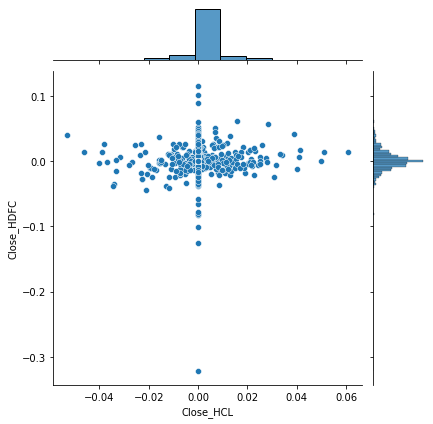

In [16]:
sns.jointplot('Close_HCL', 'Close_HDFC', tech_rets, kind='scatter')

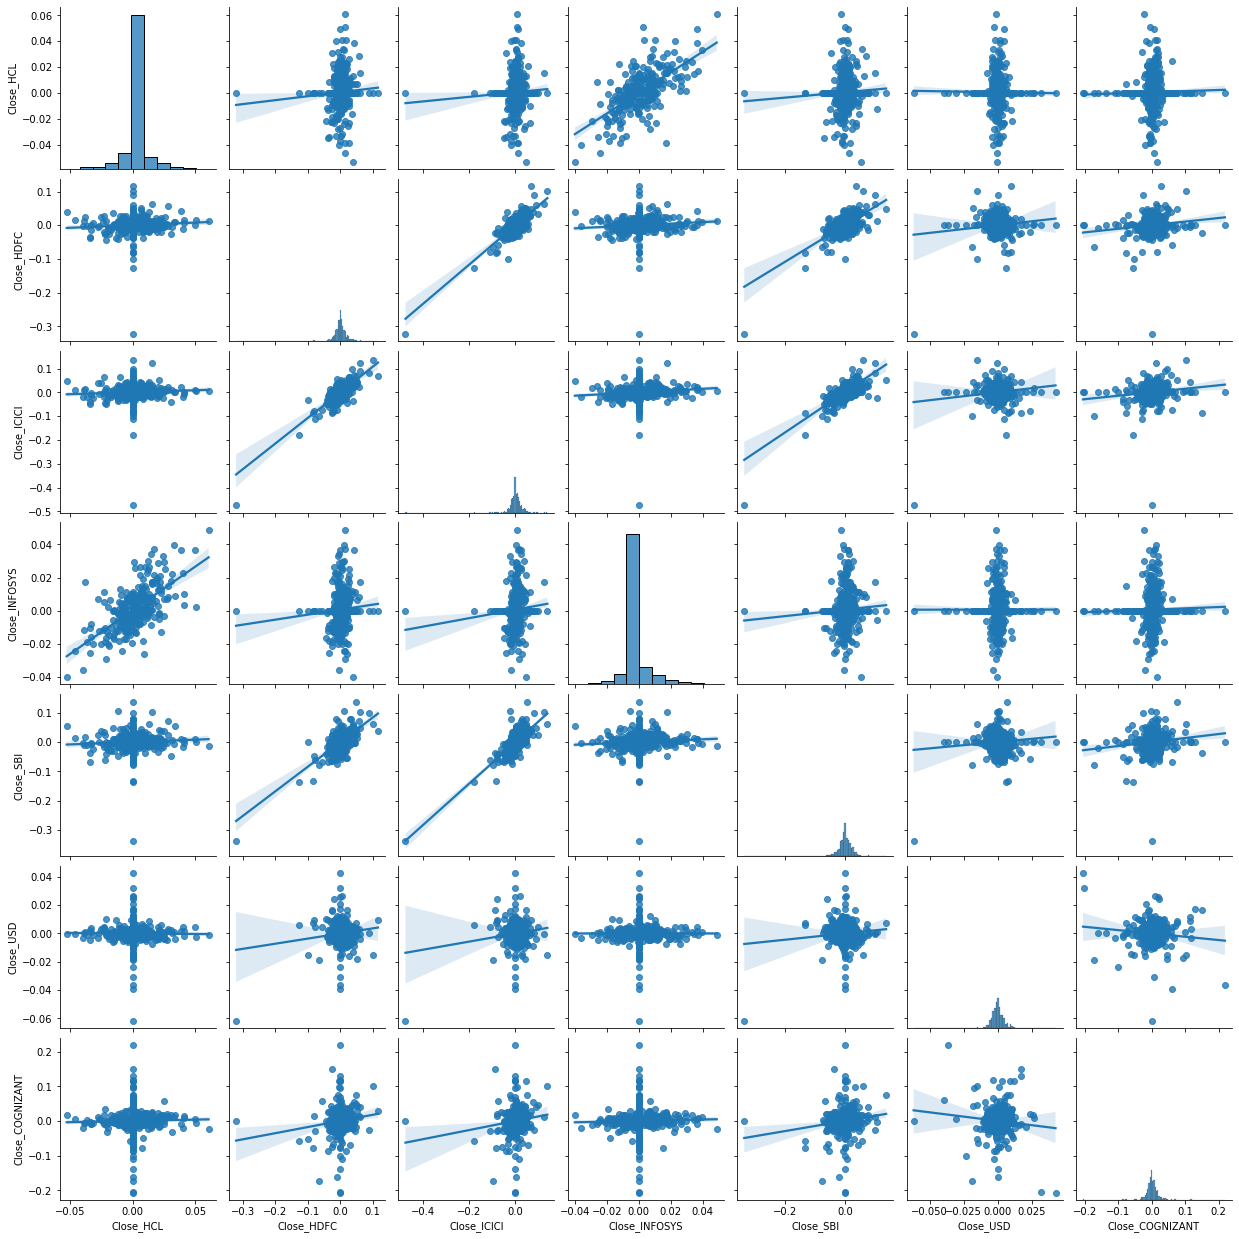

In [17]:
sns.pairplot(tech_rets, kind='reg')

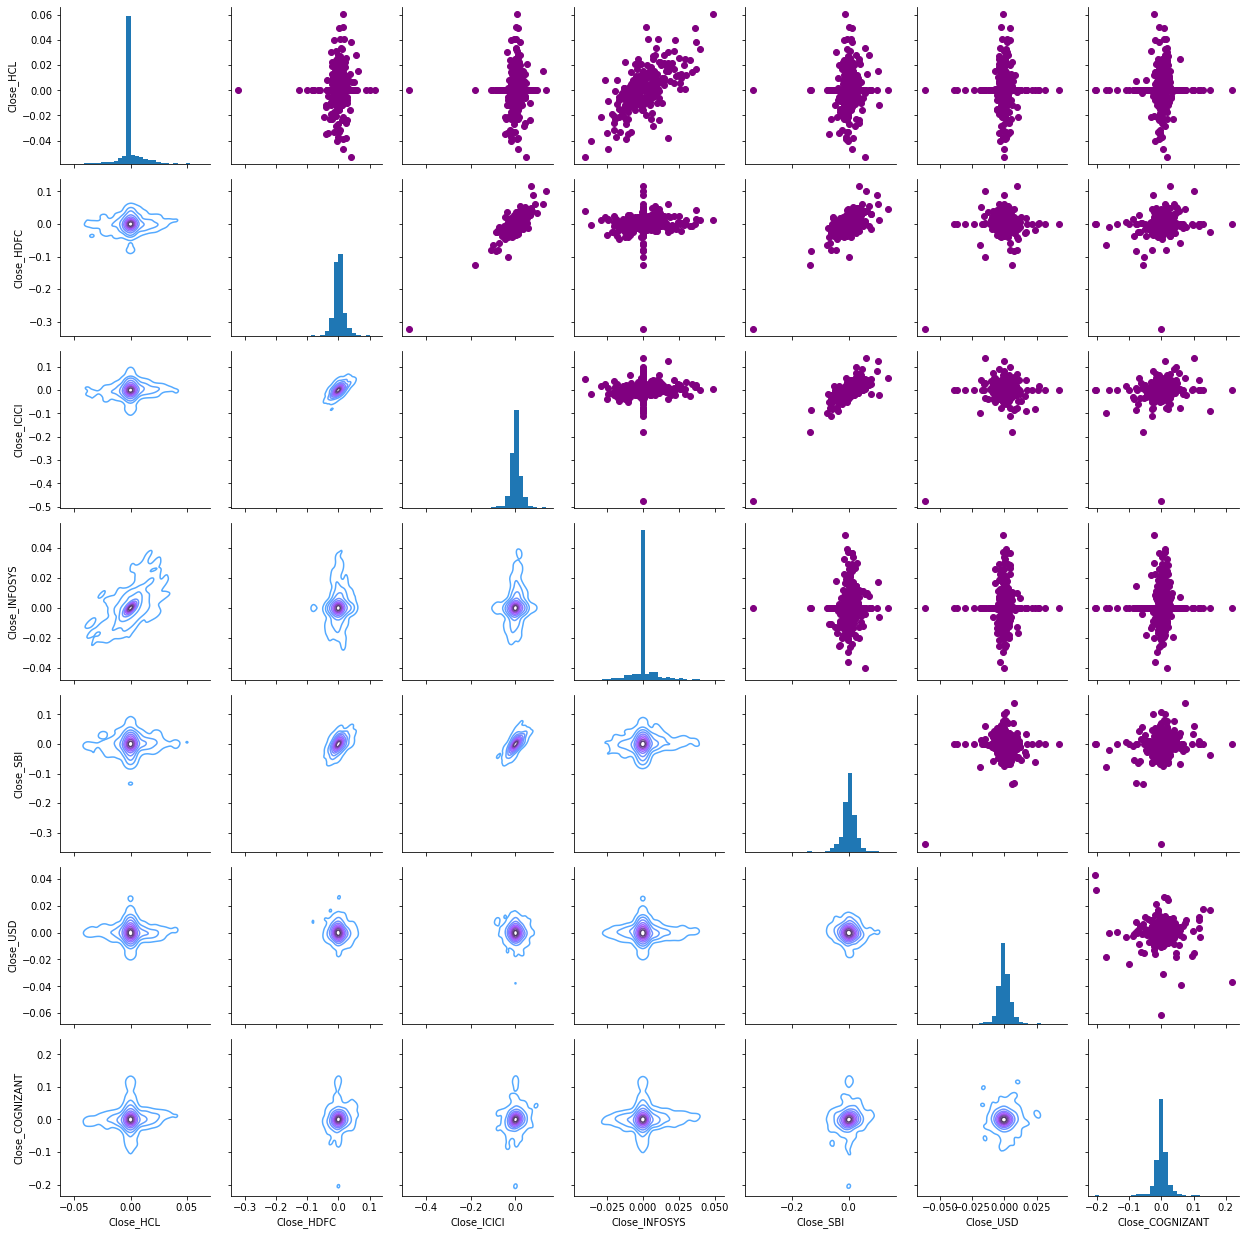

In [18]:
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

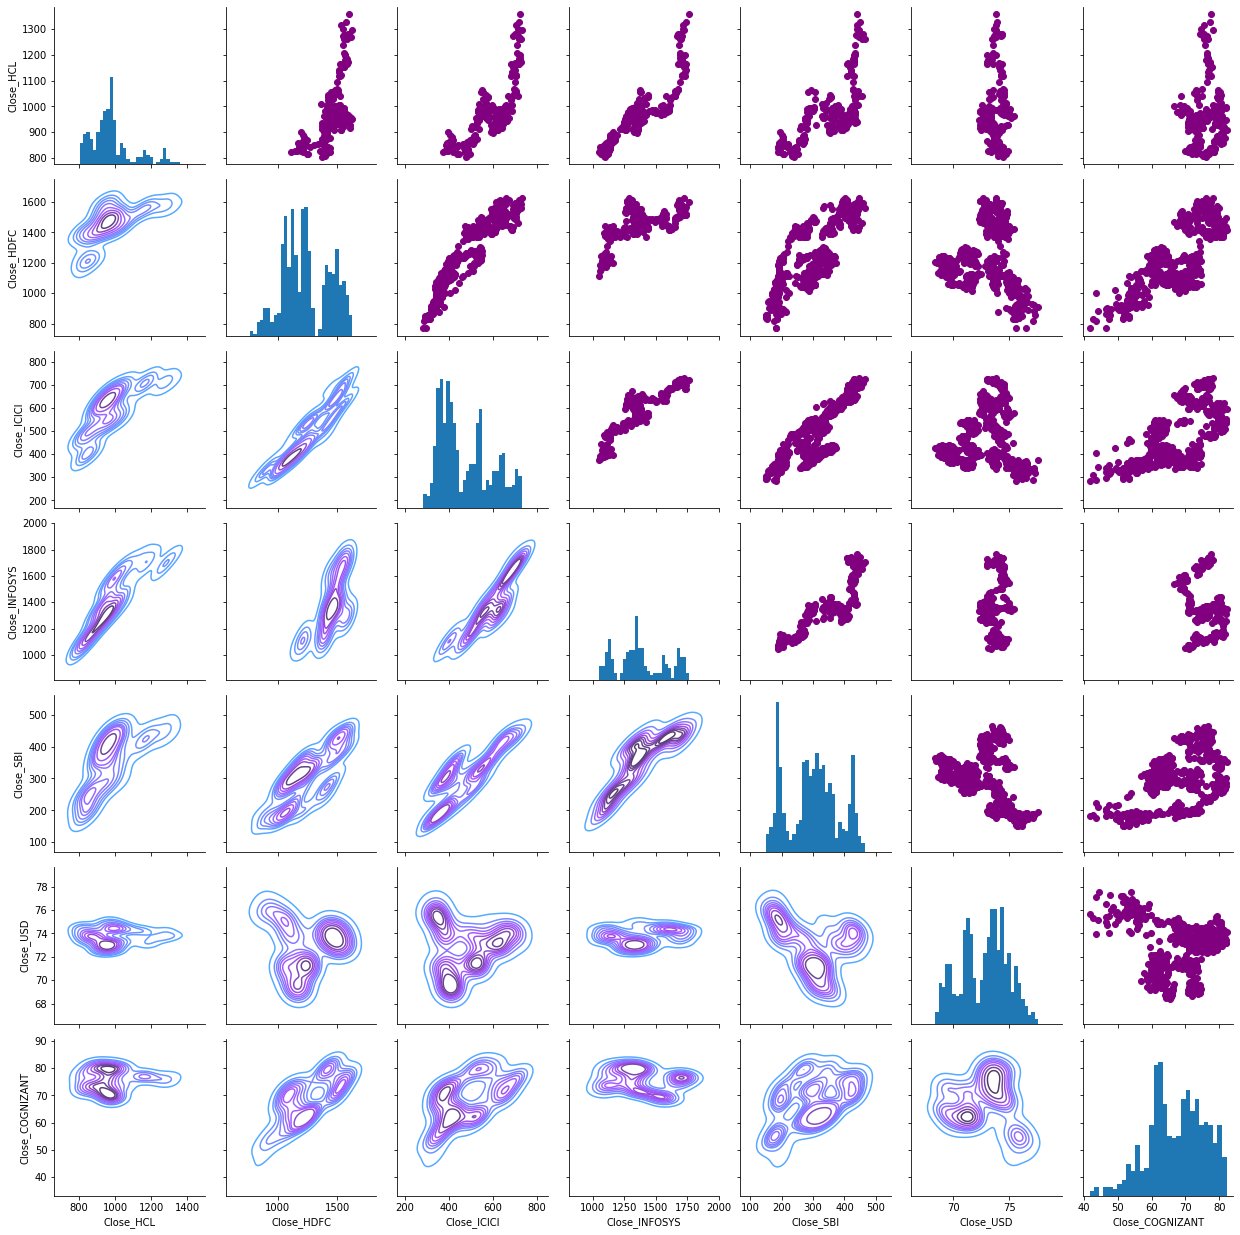

In [19]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)


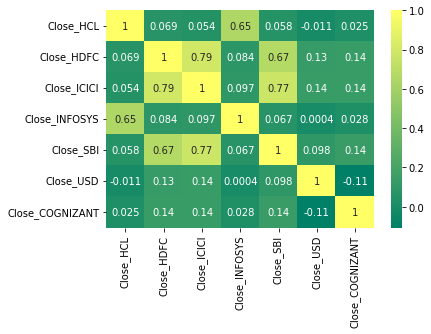

In [20]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

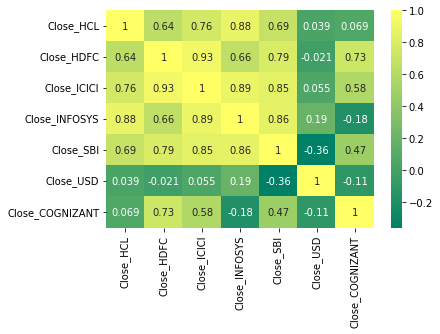

In [21]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

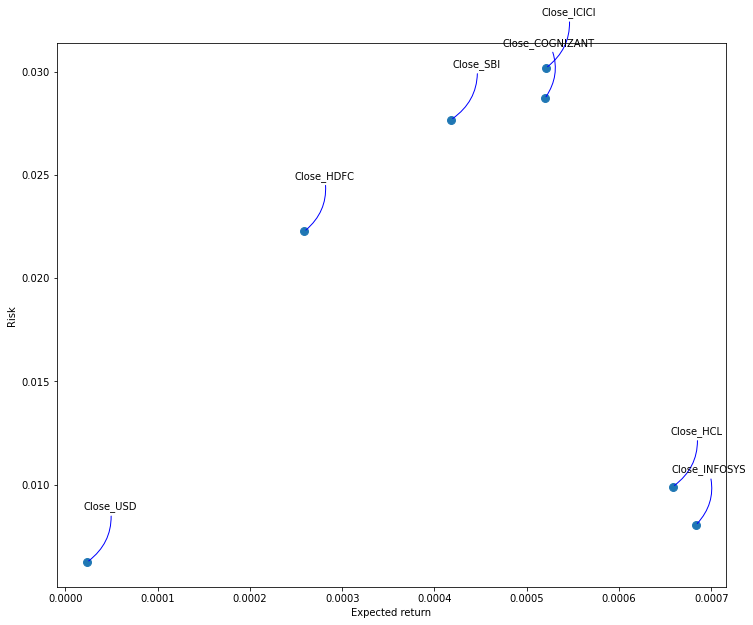

In [22]:
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

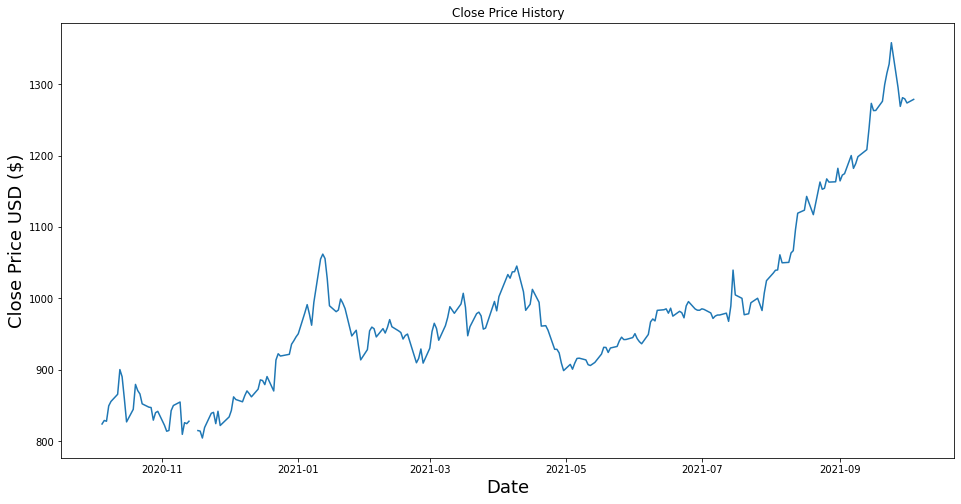

In [23]:
df = hcl
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(pd.to_datetime(df['Date']), df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

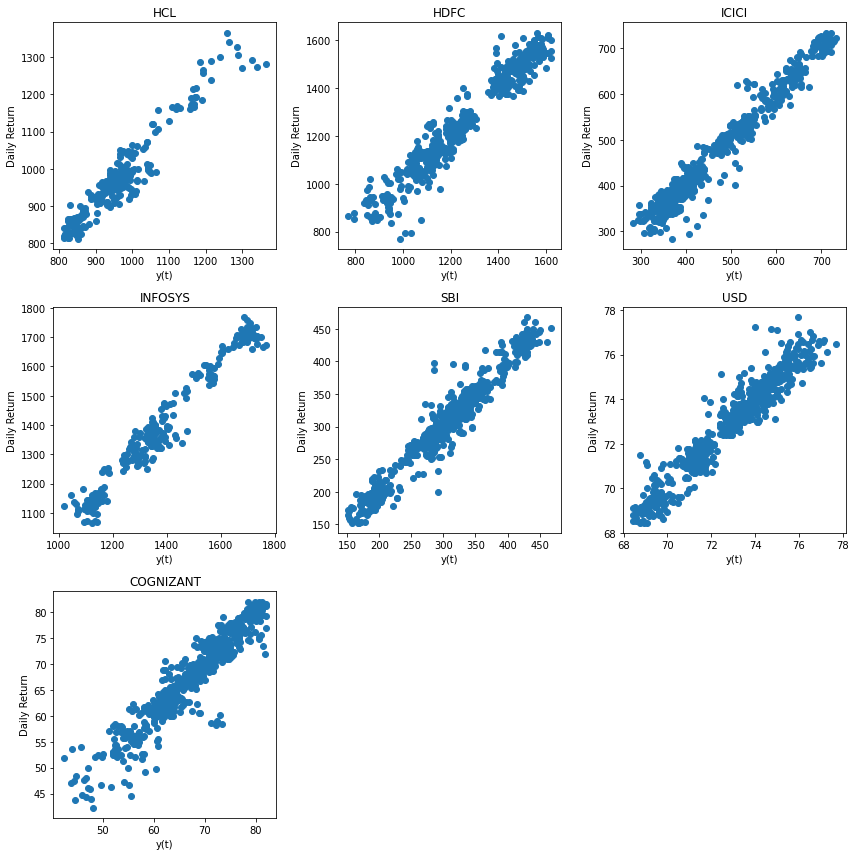

In [24]:
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    lag_plot(company['Open'], lag=5)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
plt.tight_layout()

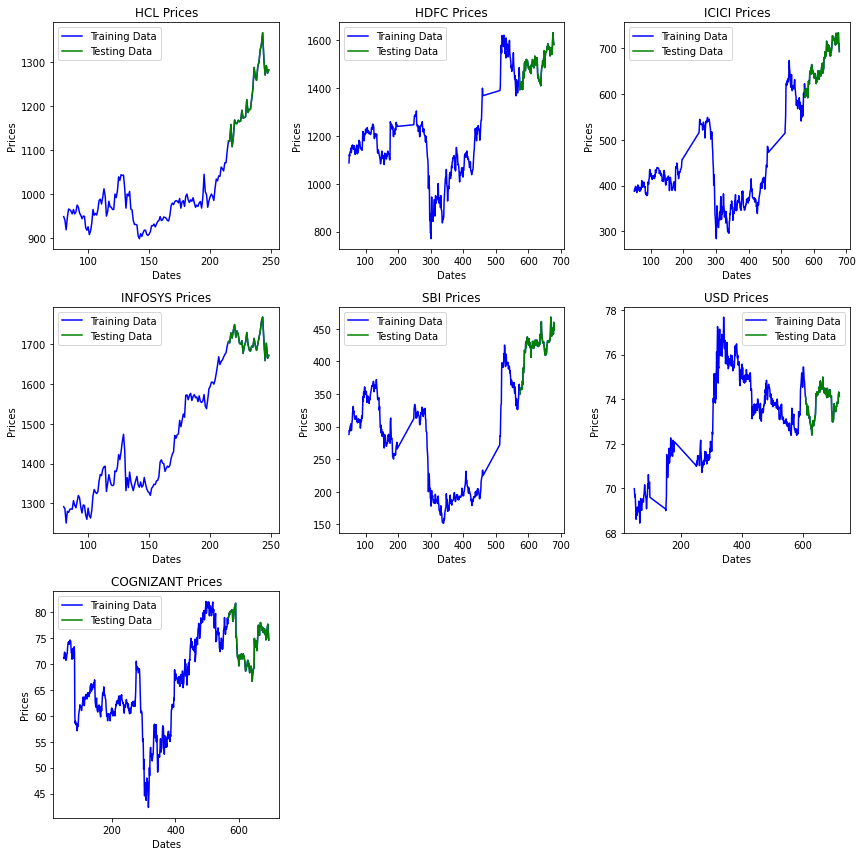

In [25]:
plt.figure(figsize=(12, 12))

for i, df in enumerate(company_list, 1):
  plt.subplot(3, 3, i)
  df = df.dropna()
  train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
  plt.title('{} Prices'.format(company_name[i-1]))
  plt.xlabel('Dates')
  plt.ylabel('Prices')
  plt.plot(df['Open'], 'blue', label='Training Data')
  plt.plot(test_data['Open'], 'green', label='Testing Data')
  # plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
  plt.legend()
plt.tight_layout()

In [26]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))



In [27]:
df = hcl
df = df.dropna()
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# error = np.sqrt(mean_squared_error(test_ar, predictions))
error = np.sqrt(np.mean(np.power((np.array(test_ar)-np.array(predictions)),2)))
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 93.718
Symmetric mean absolute percentage error: 6.131


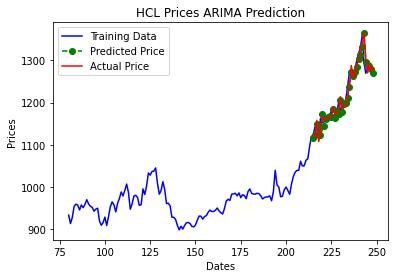

In [28]:
# plt.figure(figsize=(12,7))
plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('HCL Prices ARIMA Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

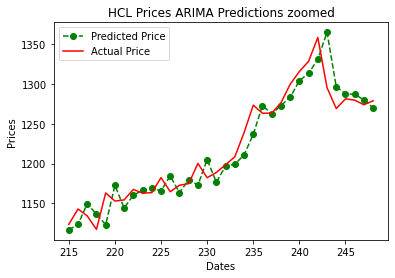

In [29]:
# plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('HCL Prices ARIMA Predictions zoomed')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [30]:
df.head(1)

,Date,Open,High,Low,Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
80,2021-01-28,948.799988,952.400024,930.099976,933.950012,6960905.0,HCL,979.81499,988.754993,915.039995,-0.022554


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


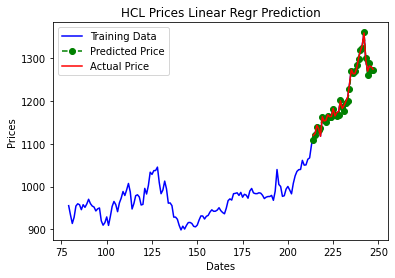

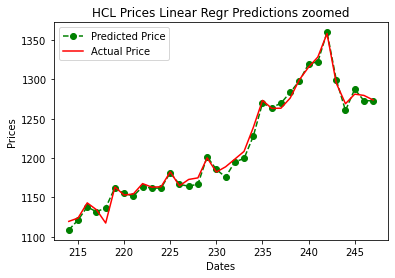

In [31]:
#### LINEAR REGRESSION
df = hcl
cols = ['MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return']
df[cols] = df[cols].shift(-1)
df = df.dropna()
train, valid = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]

x_train = train.drop(['Close', 'Date', 'company_name'], axis=1)
y_train = train['Close']
x_valid = valid.drop(['Close', 'Date', 'company_name'], axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
np.round(rms,3)

valid['Predictions'] = 0
valid['Predictions'] = preds

# plt.plot(train['Close'])
# plt.plot(valid[['Close', 'Predictions']])

plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(valid.index, preds, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(valid.index, valid['Close'], color='red', label='Actual Price')
plt.title('HCL Prices Linear Regr Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()

# plt.figure(figsize=(12,7))
plt.plot(valid.index, preds, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(valid.index, valid['Close'], color='red', label='Actual Price')
plt.title('HCL Prices Linear Regr Predictions zoomed')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


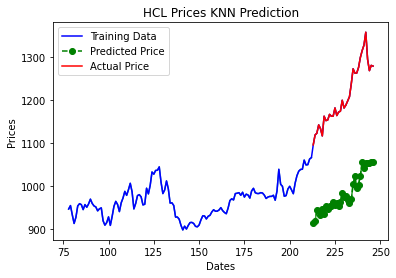

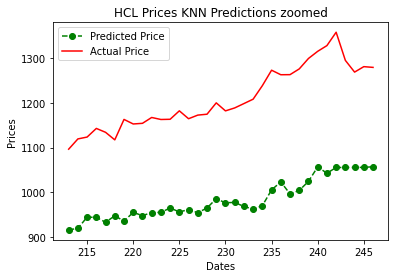

In [33]:
#### K-nearest neighbours
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

df = hcl
cols = ['MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return']
df[cols] = df[cols].shift(-1)
df = df.dropna()
train, valid = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]

x_train = train.drop(['Close', 'Date', 'company_name'], axis=1)
y_train = train['Close']
x_valid = valid.drop(['Close', 'Date', 'company_name'], axis=1)
y_valid = valid['Close']

#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
np.round(rms,3)

valid['Predictions'] = 0
valid['Predictions'] = preds

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(valid.index, preds, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(valid.index, valid['Close'], color='red', label='Actual Price')
plt.title('HCL Prices KNN Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()

# plt.figure(figsize=(12,7))
plt.plot(valid.index, preds, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(valid.index, valid['Close'], color='red', label='Actual Price')
plt.title('HCL Prices KNN Predictions zoomed')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

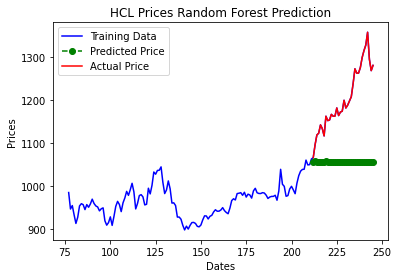

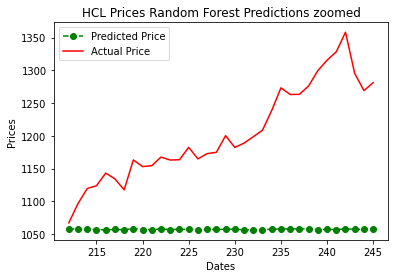

In [34]:
#### Random Forest
df = hcl
cols = ['MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return']
df[cols] = df[cols].shift(-1)
df = df.dropna()
train, valid = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]

x_train = train.drop(['Close', 'Date', 'company_name'], axis=1)
y_train = train['Close']
x_valid = valid.drop(['Close', 'Date', 'company_name'], axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0)
model.fit(x_train,y_train)
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
np.round(rms,3)

plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(valid.index, preds, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(valid.index, valid['Close'], color='red', label='Actual Price')
plt.title('HCL Prices Random Forest Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()

# plt.figure(figsize=(12,7))
plt.plot(valid.index, preds, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(valid.index, valid['Close'], color='red', label='Actual Price')
plt.title('HCL Prices Random Forest Predictions zoomed')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [ ]:
#### Random Forest
df = hcl
cols = ['MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return']
df[cols] = df[cols].shift(-1)
df = df.dropna()
train, valid = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]

x_train = train.drop(['Close', 'Date', 'company_name'], axis=1)
y_train = train['Close']
x_valid = valid.drop(['Close', 'Date', 'company_name'], axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(x_train,y_train)
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
np.round(rms,3)

plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(valid.index, preds, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(valid.index, valid['Close'], color='red', label='Actual Price')
plt.title('HCL Prices SVR Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()

# plt.figure(figsize=(12,7))
plt.plot(valid.index, preds, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(valid.index, valid['Close'], color='red', label='Actual Price')
plt.title('HCL Prices SVR Predictions zoomed')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


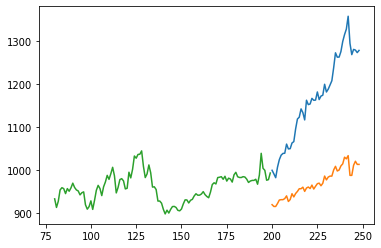

In [ ]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

In [38]:
for i, df in enumerate(company_list):
  train, valid = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
  print(company_name[i], train.shape, valid.shape)

HCL (199, 11) (50, 11)
HDFC (544, 11) (136, 11)
ICICI (544, 11) (136, 11)
INFOSYS (199, 11) (50, 11)
SBI (544, 11) (136, 11)
USD (576, 11) (144, 11)
COGNIZANT (555, 11) (139, 11)
